In [3]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()



In [5]:
text

'Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at th

In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
nlp

In [34]:
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying', u'us']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [35]:
len(text)

360082

In [36]:
type(text)

str

In [37]:
doc=nlp(text)

In [38]:
len(doc)

68315

In [16]:
type(doc.text)

str

In [39]:

# we add some words to the stop word list
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [23]:
len(article)

154

In [24]:
len(texts)

299

In [40]:

bigram = gensim.models.Phrases(texts)

In [41]:

texts = [bigram[line] for line in texts]

In [42]:
len(texts)

299

In [43]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [44]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 3),
  (39, 1),
  (40, 1),
  (41, 5),
  (42, 2),
  (43, 1),
  (44, 3),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 3),
  (56, 3),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 4),
  (76, 4),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [45]:

lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [46]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.513*"the" + 0.364*"-PRON-" + 0.132*"force" + 0.124*"israeli" + 0.117*"palestinian" + 0.113*"people" + 0.112*"australian" + 0.111*"arafat" + 0.110*"us" + 0.110*"government"'),
 (1,
  '0.365*"palestinian" + 0.352*"israeli" + 0.337*"arafat" + -0.222*"-PRON-" + 0.180*"israel" + 0.156*"official" + 0.156*"sharon" + 0.152*"hamas" + 0.142*"west_bank" + 0.128*"kill"'),
 (2,
  '0.310*"the" + -0.247*"afghanistan" + -0.227*"force" + -0.227*"us" + -0.200*"-PRON-" + -0.197*"al_qaeda" + -0.185*"bin_laden" + 0.173*"fire" + -0.150*"pakistan" + -0.133*"tora_bora"'),
 (3,
  '0.470*"-PRON-" + -0.253*"the" + 0.203*"win" + -0.189*"force" + -0.155*"afghanistan" + 0.155*"good" + -0.155*"fire" + 0.139*"test" + -0.133*"area" + 0.126*"metre"'),
 (4,
  '0.331*"fire" + -0.316*"the" + 0.261*"area" + 0.210*"sydney" + -0.159*"company" + 0.158*"firefighter" + 0.156*"south" + -0.148*"australian" + 0.142*"wind" + 0.141*"new_south"')]

In [47]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

hdpmodel.show_topics()

[(0,
  '0.004*-PRON- + 0.003*australia + 0.003*director + 0.003*ask + 0.003*the + 0.003*israeli + 0.003*match + 0.003*friedli + 0.002*company + 0.002*day + 0.002*a + 0.002*strong + 0.002*rafter + 0.002*-PRON-_not + 0.002*economy + 0.002*reply + 0.002*people + 0.002*know + 0.002*team + 0.002*follow'),
 (1,
  '0.004*the + 0.004*israeli + 0.003*arafat + 0.002*australia + 0.002*sharon + 0.002*group + 0.002*official + 0.002*people + 0.002*charge + 0.002*expectation + 0.002*hit + 0.002*-PRON- + 0.002*day + 0.002*strike + 0.002*place + 0.002*interlaken + 0.002*adventure_world + 0.002*guide + 0.002*kill + 0.002*tourist'),
 (2,
  '0.007*-PRON- + 0.005*us + 0.004*taliban + 0.003*airport + 0.003*kandahar + 0.003*afghanistan + 0.003*force + 0.002*powell + 0.002*the + 0.002*city + 0.002*laden + 0.002*near + 0.002*opposition + 0.002*believe + 0.002*kill + 0.002*night + 0.002*gul + 0.002*osama_bin + 0.002*troop + 0.002*bin_laden'),
 (3,
  '0.006*the + 0.004*company + 0.003*cent + 0.002*government + 0

In [48]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.019*"the" + 0.014*"-PRON-" + 0.004*"good" + 0.004*"day" + 0.004*"australian" + 0.004*"government" + 0.004*"win" + 0.003*"palestinian" + 0.003*"people" + 0.003*"new"'),
 (1,
  '0.011*"the" + 0.008*"-PRON-" + 0.006*"company" + 0.005*"australian" + 0.004*"union" + 0.004*"qantas" + 0.004*"year" + 0.003*"today" + 0.003*"work" + 0.003*"time"'),
 (2,
  '0.013*"the" + 0.011*"-PRON-" + 0.006*"year" + 0.005*"afghanistan" + 0.005*"australian" + 0.004*"force" + 0.003*"fire" + 0.003*"attack" + 0.003*"radio" + 0.003*"day"'),
 (3,
  '0.013*"the" + 0.012*"-PRON-" + 0.005*"government" + 0.005*"group" + 0.005*"australia" + 0.004*"israeli" + 0.004*"people" + 0.004*"day" + 0.004*"security" + 0.004*"us"'),
 (4,
  '0.020*"the" + 0.011*"-PRON-" + 0.005*"kill" + 0.004*"people" + 0.004*"government" + 0.004*"palestinian" + 0.004*"claim" + 0.004*"a" + 0.004*"report" + 0.004*"australia"'),
 (5,
  '0.018*"the" + 0.011*"australia" + 0.006*"-PRON-" + 0.005*"year" + 0.005*"people" + 0.004*"australian" + 0.0

In [49]:

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      20.570642        1       1  0.004138  0.003547
0      15.735629        1       2 -0.017742 -0.054841
1      10.524592        1       3  0.001114  0.019508
3      10.007110        1       4 -0.015310 -0.016141
9       8.578361        1       5 -0.003523 -0.005627
5       8.438582        1       6 -0.057959  0.035312
6       7.258491        1       7  0.003965 -0.024523
2       7.090430        1       8  0.024652  0.001624
4       6.497202        1       9  0.001831  0.027947
7       5.298962        1      10  0.058835  0.013195, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
41    Default   67.000000          fire   67.000000  30.0000  30.0000
326   Default  114.000000     australia  114.000000  29.0000  29.0000
102   Default  494.000000           the  494.000000  28.0000  28.0000
209   Default  333.000000        -PRON-  333.000000  27.0000  27.0000
855   Default   78.000000       israeli   78.000000  26.0000  26.0000
2173  Default   59.000000        arafat   59.000000  25.0000  25.0000
866   Default   74.000000   palestinian   74.000000  24.0000  24.0000
2354  Default   36.000000        qantas   36.000000  23.0000  23.0000
2319  Default   63.000000       company   63.000000  22.0000  22.0000
851   Default   38.000000         hamas   38.000000  21.0000  21.0000
117   Default  100.000000          year  100.000000  20.0000  20.0000
334   Default   22.000000      detainee   22.000000  19.0000  19.0000
686   Default   62.000000          kill   62.000000  18.0000  18.0000
1037  Default   69.000000           man   69.000000  17.0000  17.0000
319   Default   67.000000   afghanistan   67.000000  16.0000  16.0000
483   Default   79.000000            us   79.000000  15.0000  15.0000
44    Default  102.000000         force  102.000000  14.0000  14.0000
138   Default   62.000000         group   62.000000  13.0000  13.0000
330   Default   49.000000         claim   49.000000  12.0000  12.0000
16    Default   55.000000          call   55.000000  11.0000  11.0000
1682  Default   22.000000         radio   22.000000  10.0000  10.0000
489   Default   39.000000           win   39.000000   9.0000   9.0000
160   Default   39.000000      pakistan   39.000000   8.0000   8.0000
94    Default   38.000000         south   38.000000   7.0000   7.0000
506   Default   21.000000          line   21.000000   6.0000   6.0000
2067  Default   45.000000         child   45.000000   5.0000   5.0000
4     Default   69.000000          area   69.000000   4.0000   4.0000
15    Default   52.000000           but   52.000000   3.0000   3.0000
234   Default  110.000000    government  110.000000   2.0000   2.0000
802   Default   53.000000         union   53.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
574   Topic10    3.574821     overnight   21.379994   1.1491  -6.1210
91    Topic10    1.794363    rural_fire    7.409579   1.5195  -6.8103
1300  Topic10    4.991493        centre   39.957341   0.8576  -5.7872
16    Topic10    5.938836          call   55.495222   0.7029  -5.6134
94    Topic10    4.673619         south   38.901377   0.8186  -5.8530
4     Topic10    6.425944          area   69.726234   0.5534  -5.5346
483   Topic10    6.904723            us   79.954605   0.4884  -5.4627
160   Topic10    4.545235      pakistan   39.754320   0.7690  -5.8809
77    Topic10    4.225282         north   34.862095   0.8273  -5.9539
102   Topic10   17.586289           the  494.189774  -0.3981  -4.5278
506   Topic10    3.237793          line   21.882077   1.0269  -6.2201
626   Topic10    3.816815        damage   30.244217   0.8678  -6.0555
1468  Topic10    3.917830     bin_laden   32.812532   0.8124  -6.0294
1465  Topic10    4.625525      al_qaeda   45.982703   0.6410  -5.8634
209   Topic10   11.

In [50]:

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [51]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [52]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

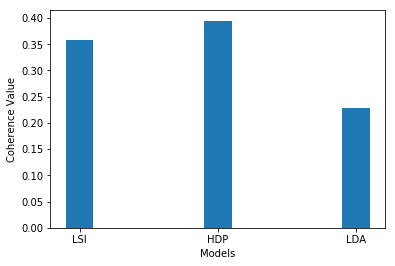

In [53]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])